In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [130]:
data=pd.read_csv(r'C:\Users\Hager\train_data.csv')

In [131]:
#1-understanding data
data.head(15)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
8,9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056.0,31-40


In [132]:
data.tail()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,11-20,4752.0,0-10


In [133]:
data.shape

(318438, 18)

In [134]:
#breif info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [135]:
data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [136]:
#Handling Missing values for Bed Grad
# Impute with the median
data['Bed Grade'].fillna(data['Bed Grade'].median(), inplace=True)

In [137]:
#Handling Missing values for city code patient
# Impute with the mode
data['City_Code_Patient'].fillna(data['City_Code_Patient'].mode()[0], inplace=True)

In [138]:
data['Stay'] = data['Stay'].apply(lambda x: x.replace('20-Nov', '11-20') if '20-Nov' in x else x)
data['Age'] = data['Age'].apply(lambda x: x.replace('20-Nov', '11-20') if '20-Nov' in x else x)
data['Stay'] = data['Stay'].apply(lambda x: x.replace('More than 100 Days', '>100') if 'More than 100 Days' in x else x)

C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


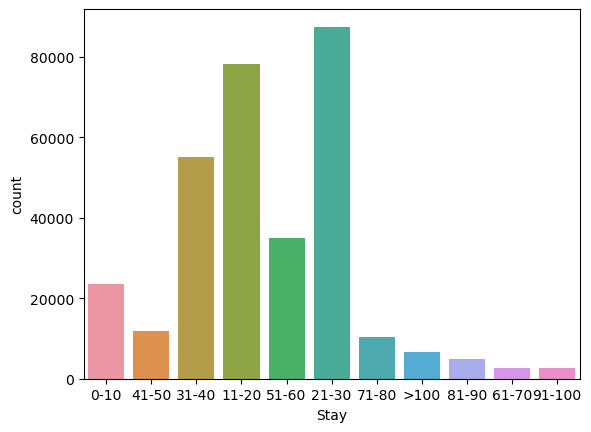

In [139]:
# Explore the distribution of the target variable 'Stay'
sns.countplot(x='Stay', data=data)
plt.show()

C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


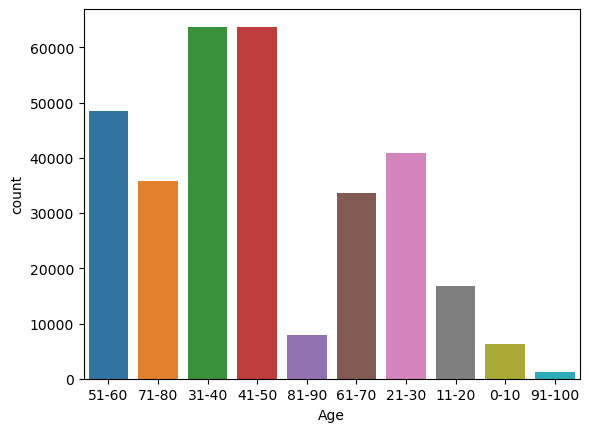

In [140]:
# Explore the distribution of the target variable 'Stay'
sns.countplot(x='Age', data=data)
plt.show()

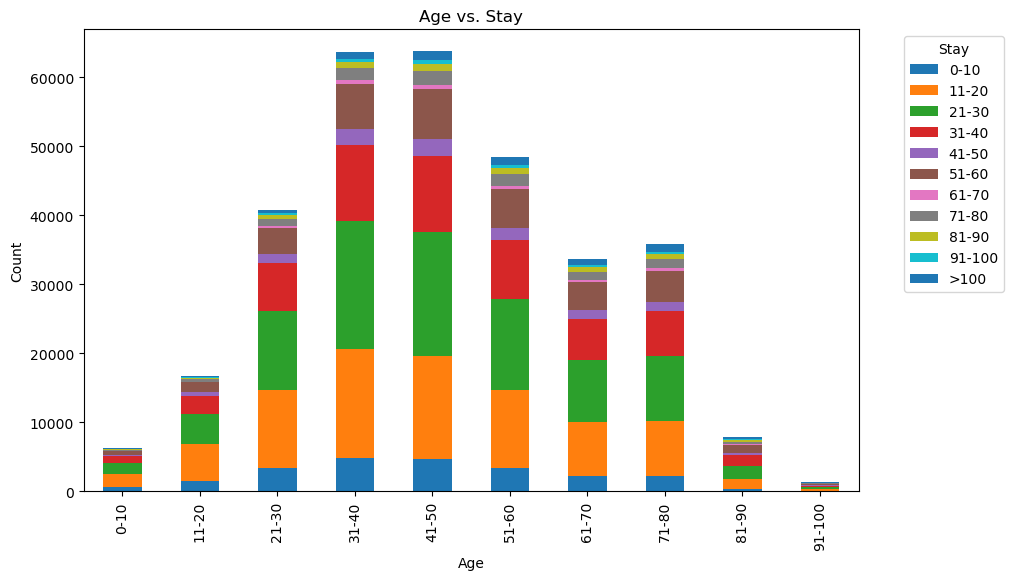

In [141]:
# Explore the relationship between 'Age' and 'Stay'
# Plotting
# Count the frequency of each combination
age_stay_counts = data.groupby(['Age', 'Stay']).size().unstack()
age_stay_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age vs. Stay')
plt.legend(title='Stay', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

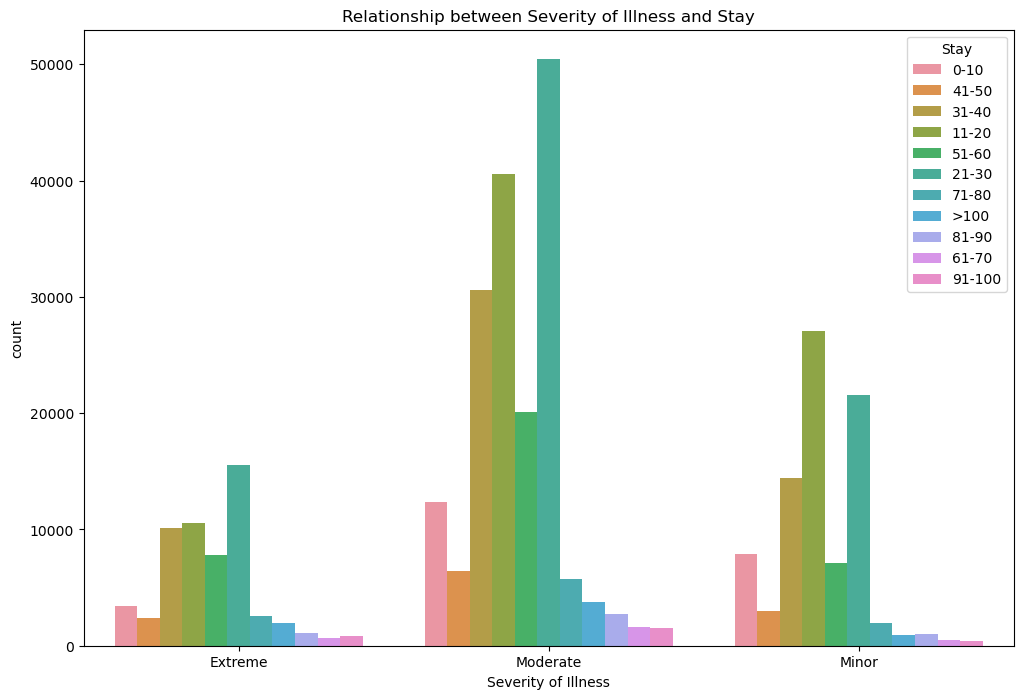

In [142]:
# Visualize the relationship between 'Severity of Illness' and 'Stay'
plt.figure(figsize=(12, 8))
sns.countplot(x='Severity of Illness', hue='Stay', data=data)
plt.title('Relationship between Severity of Illness and Stay')
plt.show()

C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


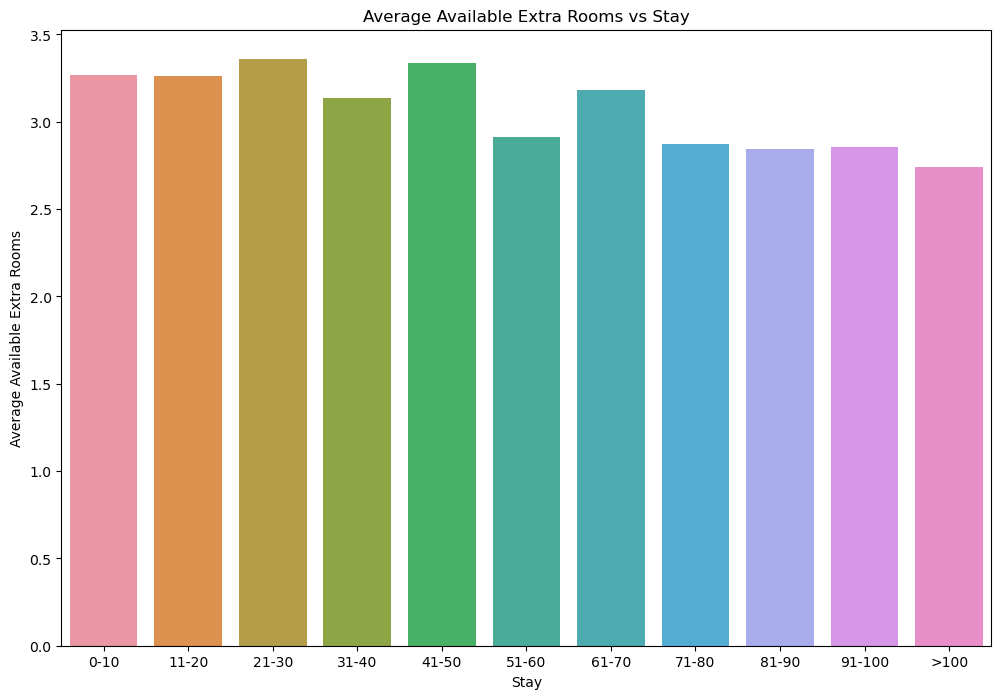

In [143]:
# Calculate the average number of available extra rooms for each 'Stay' category
avg_rooms_by_stay = data.groupby('Stay')['Available Extra Rooms in Hospital'].mean().reset_index()

# Visualize the relationship
plt.figure(figsize=(12, 8))
sns.barplot(x='Stay', y='Available Extra Rooms in Hospital', data=avg_rooms_by_stay)
plt.title('Average Available Extra Rooms vs Stay')
plt.xlabel('Stay')
plt.ylabel('Average Available Extra Rooms')
plt.show()

C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

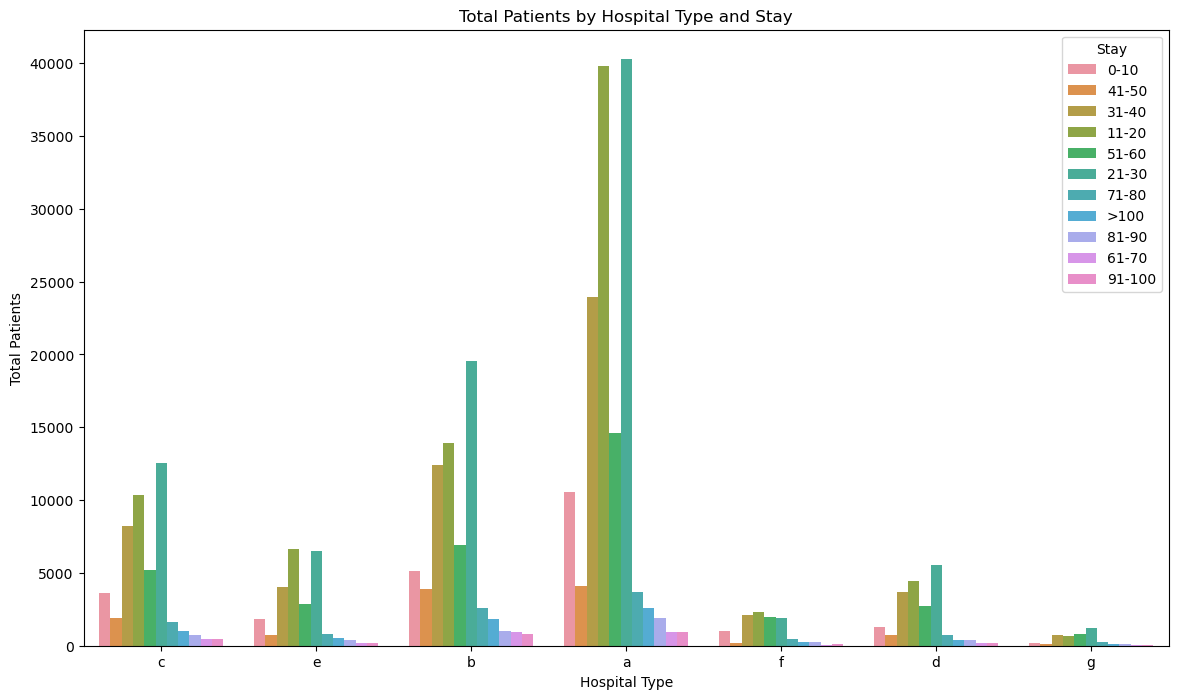

In [144]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Hospital_type_code', hue='Stay', data=data)
plt.title('Total Patients by Hospital Type and Stay')
plt.xlabel('Hospital Type')
plt.ylabel('Total Patients')
plt.show()

C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

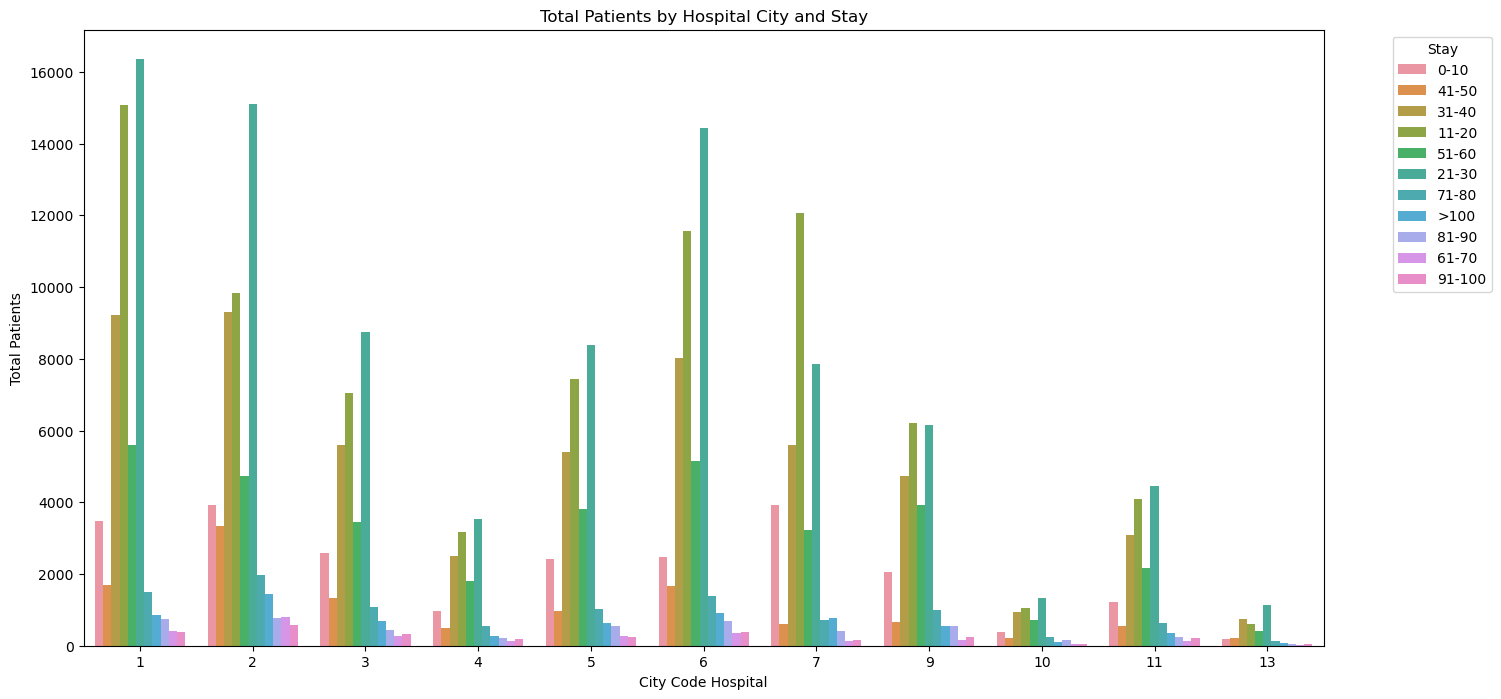

In [145]:
# Visualize the relationship between 'City_Code_Hospital', 'Hospital_region_code', and 'Stay'
plt.figure(figsize=(16, 8))
sns.countplot(x='City_Code_Hospital', hue='Stay', data=data)
plt.title('Total Patients by Hospital City and Stay')
plt.xlabel('City Code Hospital')
plt.ylabel('Total Patients')
plt.legend(title='Stay', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

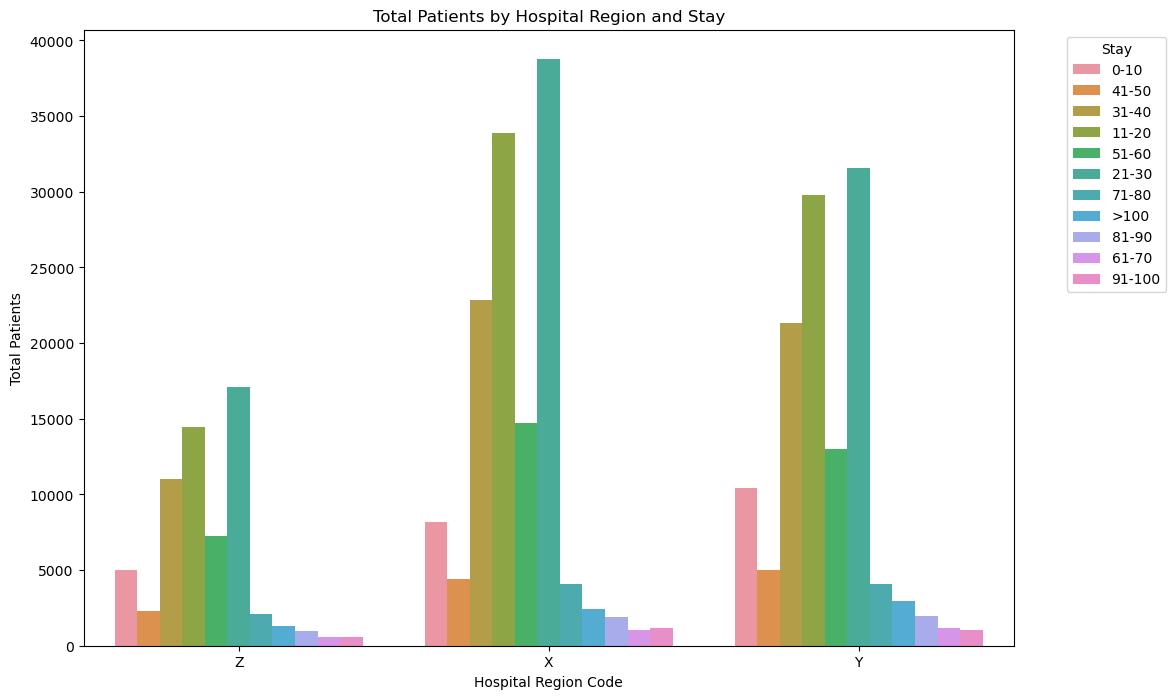

In [146]:
# Visualize the relationship between 'Hospital_region_code' and 'Stay'
plt.figure(figsize=(12, 8))
sns.countplot(x='Hospital_region_code', hue='Stay', data=data)
plt.title('Total Patients by Hospital Region and Stay')
plt.xlabel('Hospital Region Code')
plt.ylabel('Total Patients')
plt.legend(title='Stay', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hager\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


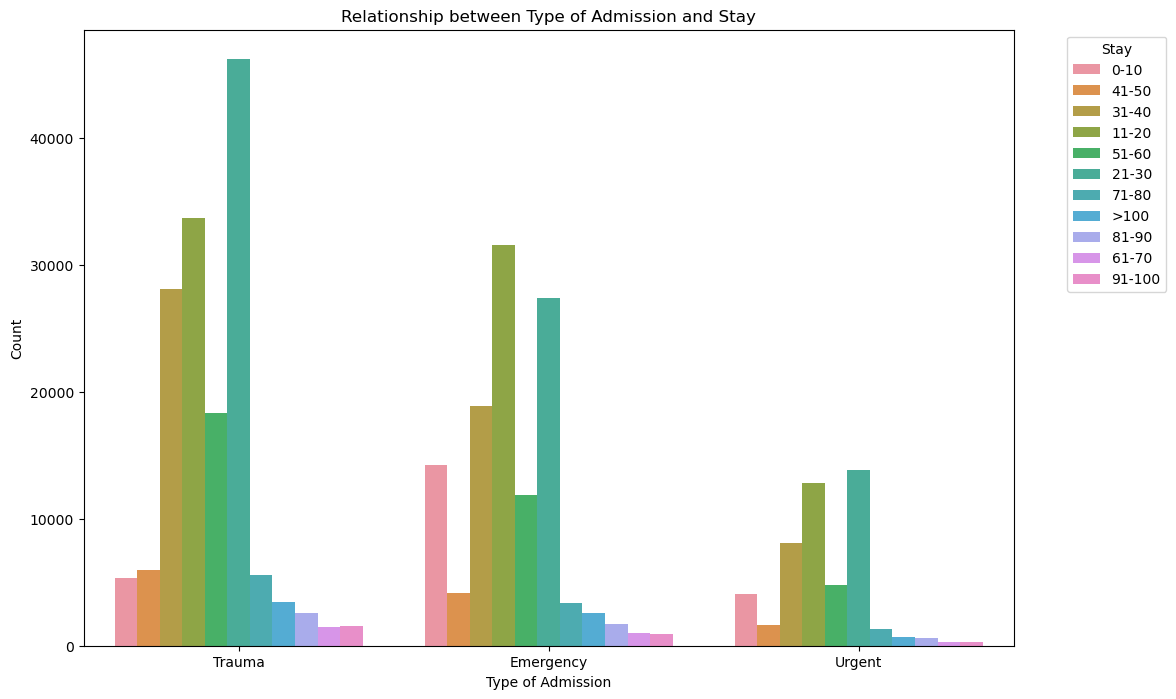

In [147]:
# Visualize the relationship between 'Type of Admission' and 'Stay'
plt.figure(figsize=(12, 8))
sns.countplot(x='Type of Admission', hue='Stay', data=data, order=data['Type of Admission'].value_counts().index)
plt.title('Relationship between Type of Admission and Stay')
plt.xlabel('Type of Admission')
plt.ylabel('Count')
plt.legend(title='Stay', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [148]:
# Convert 'Stay' to numerical values 
stay_mapping = {
    '0-10': 5,
    '11-20': 15.5,
    '21-30': 25.5,
    '31-40': 35.5,
    '41-50': 45.5,
    '51-60': 55.5,
    '61-70': 65.5,
    '71-80': 75.5,
    '81-90': 85.5,
    '91-100': 95.5,
    '>100': 120
}

# Apply the mapping to the 'Age' column
data['Stay_numeric'] = data['Stay'].map(stay_mapping)

In [149]:
age_mapping = {
    '0-10': 5,
    '11-20': 15.5,
    '21-30': 25.5,
    '31-40': 35.5,
    '41-50': 45.5,
    '51-60': 55.5,
    '61-70': 65.5,
    '71-80': 75.5,
    '81-90': 85.5,
    '91-100': 95.5,
    'More than 100 Days': 100
}

# Apply the mapping to the 'Age' column
data['Age_numeric'] = data['Age'].map(age_mapping)


In [150]:
data = data.drop(['Stay', 'Age'], axis=1)

In [151]:
# Convert categorical variables to numerical using Label Encoding
le = LabelEncoder()
data['Department'] = le.fit_transform(data['Department'])

In [152]:
le = LabelEncoder()
data['Hospital_code'] = le.fit_transform(data['Hospital_code'])

In [153]:
le = LabelEncoder()
data['Hospital_type_code'] = le.fit_transform(data['Hospital_type_code'])

In [154]:
le = LabelEncoder()
data['Ward_Type'] = le.fit_transform(data['Ward_Type'])

In [155]:
le = LabelEncoder()
data['Ward_Facility_Code'] = le.fit_transform(data['Ward_Facility_Code'])

In [156]:
le = LabelEncoder()
data['Type of Admission'] = le.fit_transform(data['Type of Admission'])

In [157]:
le = LabelEncoder()
data['Severity of Illness'] = le.fit_transform(data['Severity of Illness'])

In [158]:
data['Bed Grade'] = data['Bed Grade'].astype(int)
data['City_Code_Patient'] = data['City_Code_Patient'].astype(int)
data['Admission_Deposit'] = data['Admission_Deposit'].astype(int)

In [159]:
data['Hospital_region_code'] = data['Hospital_region_code'].apply(lambda x: x.replace('Z', '3') if 'Z' in x else x)
data['Hospital_region_code'] = data['Hospital_region_code'].apply(lambda x: x.replace('Y', '2') if 'Y' in x else x)
data['Hospital_region_code'] = data['Hospital_region_code'].apply(lambda x: x.replace('X', '1') if 'X' in x else x)

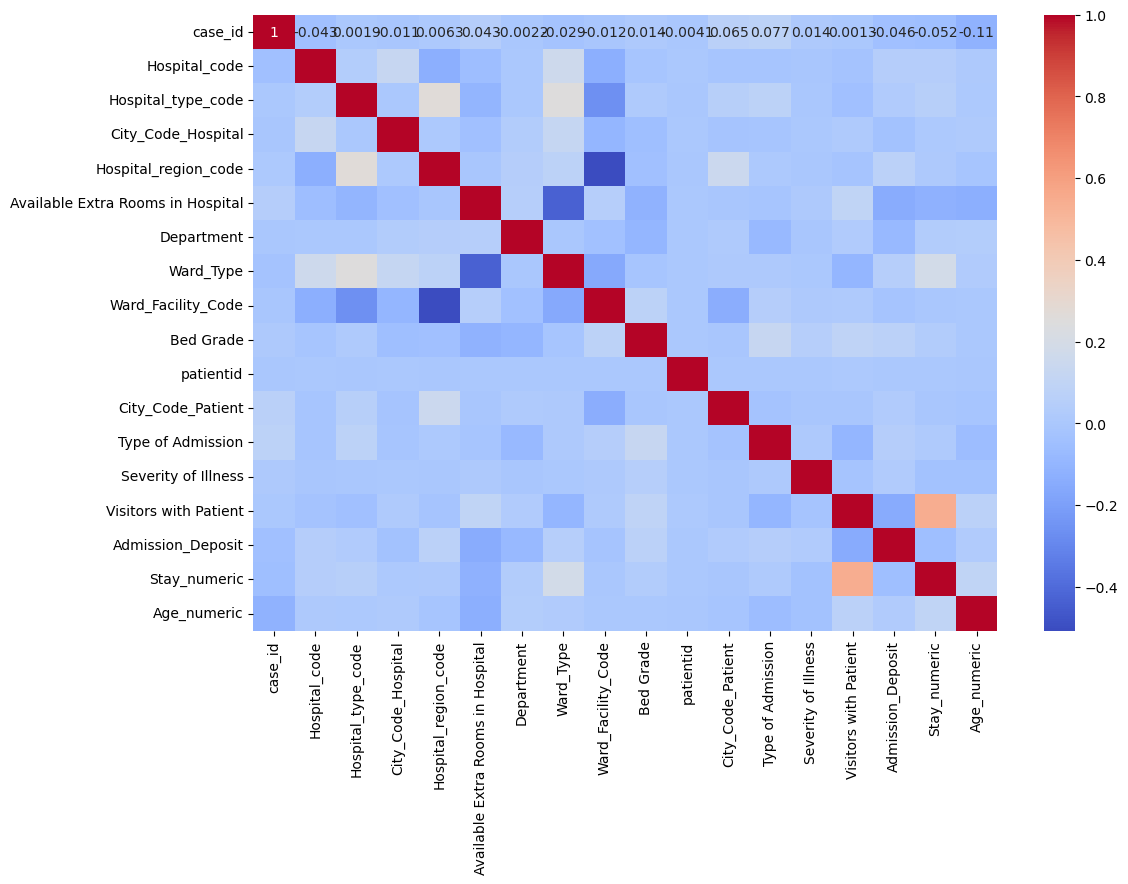

In [160]:


# Explore correlations
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',xticklabels=data.columns, yticklabels=data.columns)
plt.show()

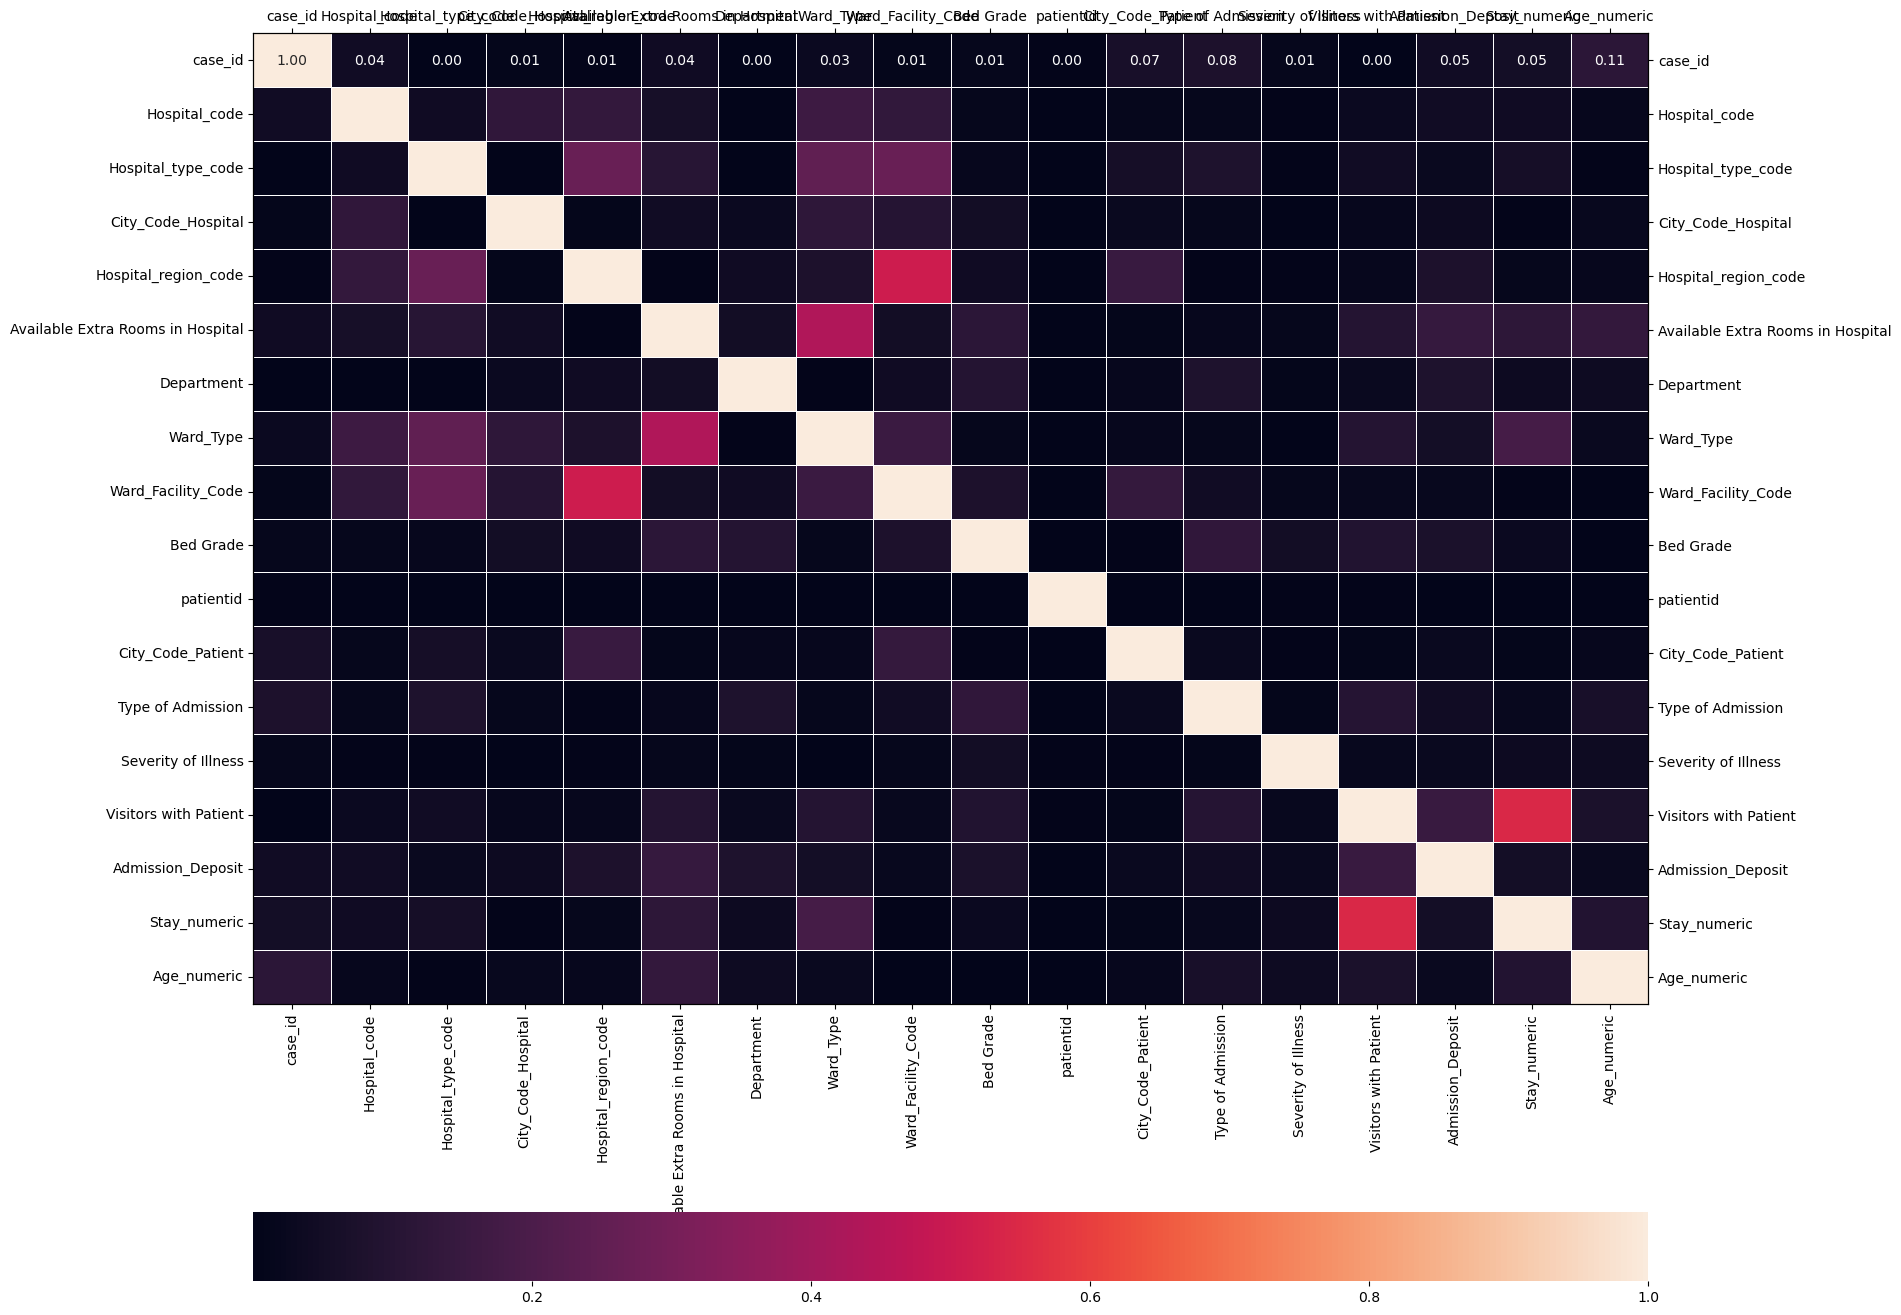

In [161]:
#1- Factors influencing the length of stay:
# Explore correlations

size = len(data.columns)
f,ax = plt.subplots(figsize=(size, size))
sns.heatmap(data.corr().abs(), annot=True, linewidths=.5, fmt= '.2f',ax=ax, cbar_kws={'orientation': 'horizontal'})
ax3 = ax.twiny()
ax3.set_xlim([0, ax.get_xlim()[1]])
ax3.set_xticks(ax.get_xticks())
ax3.set_xticklabels(data.columns.tolist())
ax4 = ax.twinx()
ax4.set_ylim([ax.get_ylim()[0],0])
ax4.set_yticks(ax.get_yticks())
ax4.set_yticklabels(data.columns.tolist())
plt.show()

In [164]:
# Encode the target variable 'Stay' to numerical values
le = LabelEncoder()
data['Stay_encoded'] = le.fit_transform(data['Stay_numeric'])

# Define features and target
X = data.drop(['Stay_numeric', 'Stay_encoded'], axis=1)
y = data['Stay_encoded']

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_classifier = rf_classifier.predict(X_test)

In [166]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classifier)
print(f'Accuracy: {accuracy}')

Accuracy: 0.41802223338776534


In [169]:
# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_classifier))

Confusion Matrix:
[[  822  2152  1589    98     4    20     0     3     0     1     0]
 [  616  7680  5838   922    17   479     1     5     3     0     0]
 [  404  5403 10780   648    37   283     4     9    18     0    17]
 [  209  2124  4035  2801    16  1694     1    54    10     0    37]
 [   86   552  1253   236    21   185     1     3     3     0    17]
 [   99   568   929  1773     8  3483     1    89    91     4    83]
 [   17    92   232    66     3   103     8     7    12     0    14]
 [   24   125   192   419     3   938     0   182    20     4   124]
 [    9    35    35   120     0   453     0    16   177     1    95]
 [    4    34    45   101     1   242     0    11     5    47    62]
 [   23    45    61    97     1   340     1    46    51     4   622]]


In [175]:
#Define features and target
X = data.drop(['Stay_numeric'], axis=1)  # Features
y = data['Stay_numeric']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# If you want to see the coefficients of each feature
coefficients = pd.Series(model.coef_, index=X.columns)
print('Coefficients:')
print(coefficients)

Mean Squared Error: 3.0422840691057815
Coefficients:
case_id                              3.619093e-07
Hospital_code                        3.884760e-04
Hospital_type_code                  -2.289997e-02
City_Code_Hospital                  -4.828554e-03
Hospital_region_code                 1.003660e-02
Available Extra Rooms in Hospital   -2.844008e-02
Department                           2.472541e-02
Ward_Type                            2.613820e-02
Ward_Facility_Code                  -1.256881e-02
Bed Grade                            5.257116e-02
patientid                           -1.902586e-08
City_Code_Patient                    1.674357e-03
Type of Admission                   -1.762204e-02
Severity of Illness                 -1.135557e-02
Visitors with Patient                1.920047e-01
Admission_Deposit                    3.062042e-05
Age_numeric                         -8.551497e-04
Stay_encoded                         1.041881e+01
dtype: float64


In [176]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define features and target
X = data.drop(['Stay_numeric'], axis=1)
y = data['Stay_numeric']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

Mean Squared Error (Random Forest): 0.0


In [177]:
from sklearn.metrics import r2_score

# Calculate R-squared for Linear Regression
r2_linear = r2_score(y_test, y_pred)
print(f'R-squared (Linear Regression): {r2_linear}')

# Calculate R-squared for Random Forest Regressor
r2_rf = r2_score(y_test, y_pred_rf)
print(f'R-squared (Random Forest): {r2_rf}')

R-squared (Linear Regression): 0.9939915670912561
R-squared (Random Forest): 1.0
